In [1]:
# Load required packages
library(ggplot2)
library(RColorBrewer)


In [2]:
# Load data from Ludis s3 repository
data <- read.csv("https://ludis-rugby.s3.amazonaws.com/clean-data/CLEAN_Complete_TimeExtended.csv")


### Game Time Histogram

In [3]:
# This function takes in a league, a time, and a number of breaks (brx) and outputs
# a histogram visualization of the distribution of the chosen unit of game time for the
# specified league.
# - The league is passed in as a string (optional)
# - The time is passed in as a string, referencing Minutes or Games
# - The number of histogram breaks (brx) is passed in as an integer (optional)
# The function returns an error message if the arguments are incorrect.
gametimehist <- function(league, time, brx) {
    # Subsets the data to the leagues specified in the group argument, if passed in.
    if(missing(league)){
        # The dataframe stays the same if no league arguement is passed in
        dt <- data
        maintitle <- "All Leagues"
      # The dataframe will be subset to those rows with International teams
    } else if(league == "International"){
        dt <- data[data$Team == "wales" | data$Team == "new-zealand" | data$Team == "australia" | data$Team == "scotland" | data$Team == "samoa" | data$Team == "argentina" | data$Team == "usa" | data$Team == "italy" | data$Team == "fiji" | data$Team == "france" | data$Team == "japan" | data$Team == "canada" | data$Team == "ireland" | data$Team == "england" | data$Team == "tonga" | data$Team == "south-africa" | data$Team == "georgia", ]
        maintitle <- "International"
      # The dataframe will be subset to those rows with Super Rugby teams
    } else if(league == "Super Rugby"){
        dt <- data[data$Team == "highlanders" | data$Team == "waratahs" | data$Team == "rebels" | data$Team == "reds" | data$Team == "jaguares" | data$Team == "chiefs" | data$Team == "blues" | data$Team == "stormers" | data$Team == "hurricanes" | data$Team == "sunwolves" | data$Team == "brumbies" | data$Team == "sharks" | data$Team == "bulls" | data$Team == "crusaders" | data$Team == "lions", ]
        maintitle <- "Super Rugby"
      # The dataframe will be subset to those rows with Premiership teams
    } else if(league == "Premiership"){
        dt <- data[data$Team == "bath" | data$Team == "bristol" | data$Team == "exeter-chiefs" | data$Team == "gloucester" | data$Team == "harlequins" | data$Team == "leicester" | data$Team == "northampton" | data$Team == "sale" | data$Team == "saracens" | data$Team == "wasps" | data$Team == "worcester", ]
        maintitle <- "Premiership"
      # The dataframe will be subset to those rows with Pro 14 teams
    } else if(league == "Pro14"){
        dt <- data[data$Team == "benetton" | data$Team == "cardiff-blues" | data$Team == "cheetahs" | data$Team == "connacht" | data$Team == "edinburgh" | data$Team == "glasgow" | data$Team == "gwent-dragons" | data$Team == "kings" | data$Team == "leinster" | data$Team == "munster" | data$Team == "ospreys" | data$Team == "scarlets" | data$Team == "ulster" | data$Team == "zebre", ]
        maintitle <- "Pro14"
    }  
    
    # Gets the game time data indicated by the time argument
    if(missing(time)) {
        return(print("Please select Minutes or Games to analyze the data."))
    } else if (time == "Minutes" || time == "minutes" || time == "Minute" || time == "minute" || time == "min" || time == "Min" || time == "mins" || time == "Mins") {
        # Remove any rows missing Minutes Played data
        dt <- dt[complete.cases(dt[ , which(names(dt) == "Minutes.Played")]) ,]
        played <- dt$Minutes.Played
        xlab <- "Minutes"
    } else if (time == "Games" || time == "games" || time == "Game" || time == "game") {
        # Remove any rows missing Games played data
        dt <- dt[complete.cases(dt[ , which(names(dt) == "Games")]) ,]
        played <- dt$Games
        xlab <- "Games"
    } else {
        return(print("Please check the spelling of the chosen unit of time."))
    }

    # Sets the default number of breaks in the histogram to 10
    if(missing(brx)) {
        brx <- 10
    }

    # Creates the histogram visualization
    histplot <- ggplot(data = as.data.frame(played),
                       aes(x = played,
                           text = paste0(xlab, " Played: ", ..x..,
                                         "\nFrequency: ", ..count..))) + 
        geom_histogram(breaks = seq(min(played), max(played), length = brx + 1), aes(fill = ..count..)) +
        labs(title = paste("Distribution of Number of", xlab, "Played/Season,", maintitle), x = paste(xlab, "Played"), y = "Frequency", fill = "Frequency")
    
    # Returns the histogram plot
    return(histplot)
}

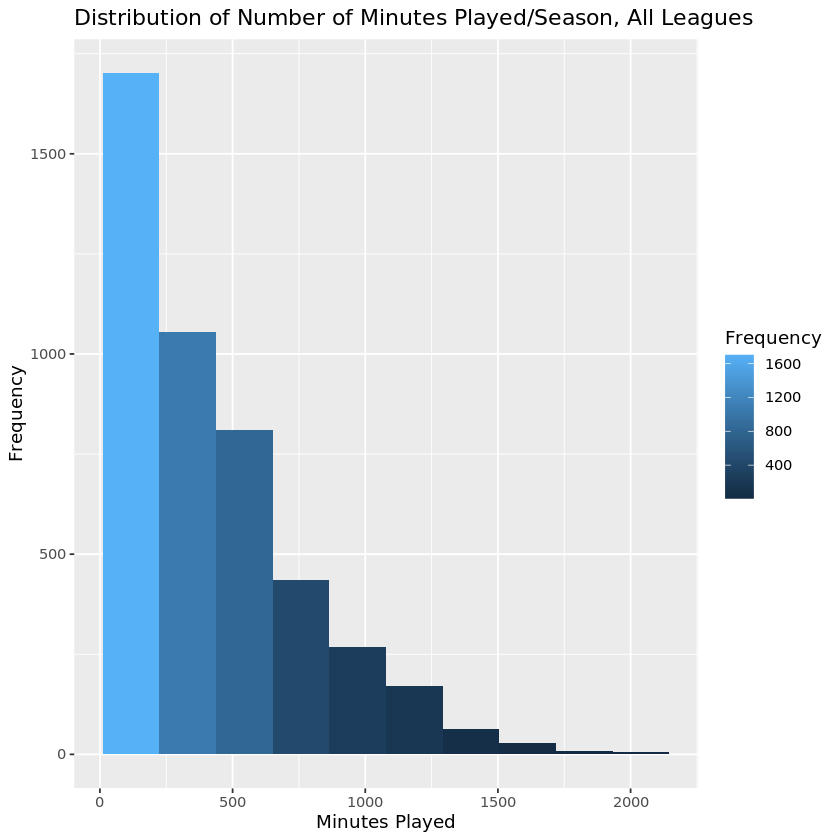

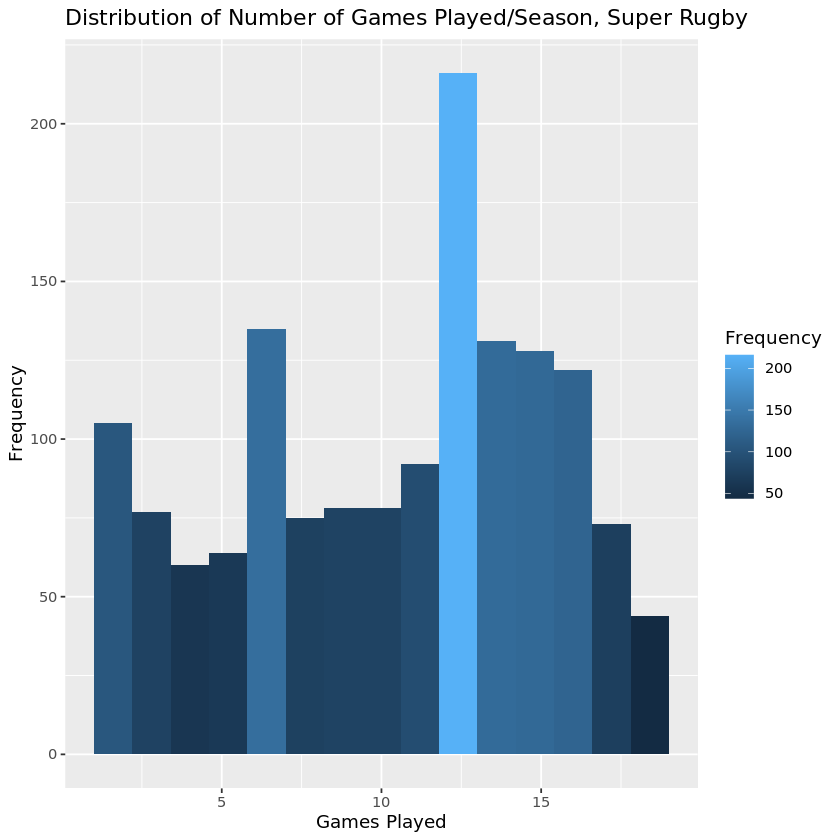

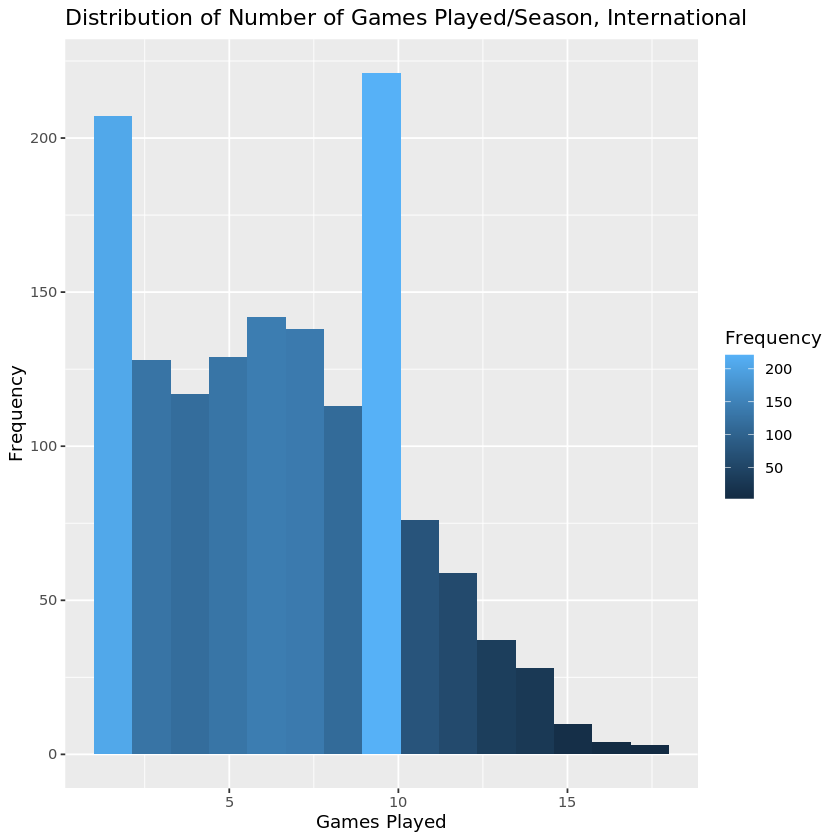

In [4]:
gametimehist(time = "Minutes", brx = 10)
gametimehist(league = "Super Rugby", time = "Games", brx = 15)
gametimehist(league = "International", time = "Games", brx = 15)


### K-means Clustering, 2D

In [5]:
# This function takes in 2 variables, a dataset, a number k, a group argument, and a league argument.
# It clusters on the 2 variables passed in, on k number of clusters passed in, and returns the output manipulated dataset.
# - The group argument (optional) will subset the dataset to "Forwards" or "Backs"
# - The league argument (optional) will subset the dataset to International, Super Rugby, Premiership, or Pro14 players
cluster2d <- function(stat1, stat2, dataset, k, group, league){
    # Subsets dataset to rows with complete data for the variables passed in
    dataset <- dataset[complete.cases(dataset[ , which(names(dataset) == stat1)]) ,]
    dataset <- dataset[complete.cases(dataset[ , which(names(dataset) == stat2)]) ,]

    # Subsets the data to the groups specified in the group argument, if passed in  
    if(missing(group)){
        # the dataframe stays the same if no group arguement is passed in
        dataset <- dataset

    } else if(group == "Backs"){
        # The dataframe will be subset to those rows with backs
        dataset <- dataset[dataset$PosNumber == 9 | dataset$PosNumber == 10 | dataset$PosNumber == 11 | dataset$PosNumber == 12 | dataset$PosNumber == 13 | dataset$PosNumber == 14 | dataset$PosNumber == 15, ]
    } else if(group == "Forwards"){
        # The dataframe will be subset to those rows with forwards
        dataset <- dataset[dataset$PosNumber == 1 | dataset$PosNumber == 2 | dataset$PosNumber == 3 | dataset$PosNumber == 4 | dataset$PosNumber == 5 | dataset$PosNumber == 6 | dataset$PosNumber == 7 | dataset$PosNumber == 8, ]
    }

    # Subsets the data to the leagues specified in the group argument, if passed in.
    if(missing(league)){
        # The dataframe stays the same if no league arguement is passed in
        dataset <- dataset
        league <- "All Leagues"
    # The dataframe will be subset to those rows with international teams
    } else if(league == "International"){
        dataset <- dataset[dataset$Team == "wales" | dataset$Team == "new-zealand" | dataset$Team == "australia" | dataset$Team == "scotland" | dataset$Team == "samoa" | dataset$Team == "argentina" | dataset$Team == "usa" | dataset$Team == "italy" | dataset$Team == "fiji" | dataset$Team == "france" | dataset$Team == "japan" | dataset$Team == "canada" | dataset$Team == "ireland" | dataset$Team == "england" | dataset$Team == "tonga" | dataset$Team == "south-africa" | dataset$Team == "georgia", ]
    # The dataframe will be subset to those rows with super rugby teams
    } else if(league == "Super Rugby"){
        dataset <- dataset[dataset$Team == "highlanders" | dataset$Team == "waratahs" | dataset$Team == "rebels" | dataset$Team == "reds" | dataset$Team == "jaguares" | dataset$Team == "chiefs" | dataset$Team == "blues" | dataset$Team == "stormers" | dataset$Team == "hurricanes" | dataset$Team == "sunwolves" | dataset$Team == "brumbies" | dataset$Team == "sharks" | dataset$Team == "bulls" | dataset$Team == "crusaders" | dataset$Team == "lions", ]
    # The dataframe will be subset to those rows with premiership teams
    } else if(league == "Premiership"){
        dataset <- dataset[dataset$Team == "bath" | dataset$Team == "bristol" | dataset$Team == "exeter-chiefs" | dataset$Team == "gloucester" | dataset$Team == "harlequins" | dataset$Team == "leicester" | dataset$Team == "northampton" | dataset$Team == "sale" | dataset$Team == "saracens" | dataset$Team == "wasps" | dataset$Team == "worcester", ]
    # The dataframe will be subset to those rows with pro 14 teams
    } else if(league == "Pro14"){
        dataset <- dataset[dataset$Team == "benetton" | dataset$Team == "cardiff-blues" | dataset$Team == "cheetahs" | dataset$Team == "connacht" | dataset$Team == "edinburgh" | dataset$Team == "glasgow" | dataset$Team == "gwent-dragons" | dataset$Team == "kings" | dataset$Team == "leinster" | dataset$Team == "munster" | dataset$Team == "ospreys" | dataset$Team == "scarlets" | dataset$Team == "ulster" | dataset$Team == "zebre", ]
    }

    # Runs the kmeans function to produce k cluster groups  
    kgroupings <- kmeans(dataset[, c(which(names(dataset) == stat1), which(names(dataset) == stat2))], k)

    # Adds the clustering assignments to the dataset  
    dataset$cluster <- kgroupings$cluster

    ## Plot Visualizations
    # Creates a vector of colors to use for cluster visualizations.
    clusterCol <- setNames(c("red", "orange", "darkgreen", "blue", "purple", "pink", "brown", "black", "gold"),
                           levels(c("1", "2", "3", "4", "5", "6", "7", "8", "9")))

    # For Personal stats, indicate the unit along the x/y axis
    if (stat1 == "Height") {
        xunit <- "(cm)"
    } else if (stat1 == "Weight") {
        xunit <- "(kg)"
    } else if (stat1 == "Age") {
        xunit <- "(yr)"
    } else {
        xunit <- ""
    }
    if (stat2 == "Height") {
        yunit <- "(cm)"
    } else if (stat2 == "Weight") {
        yunit <- "(kg)"
    } else if (stat2 == "Age") {
        yunit <- "(yr)"
    } else {
        yunit <- ""
    }

    # Creates the scatter plot visualization
    plotVis <- ggplot(dataset, aes(x = get(stat1), y = get(stat2), color = as.factor(cluster), label = PosNumber)) +
                      geom_text(size = 4, show.legend = FALSE) + scale_color_manual(values = clusterCol) +
                      ggtitle(paste(stat1, "x", stat2, k, "Clusters,", league)) + xlab(paste(stat1, xunit)) + ylab(paste(stat2, yunit)) + 
                      theme(plot.title = element_text(face = "bold"))

    # Creates the bar plot visualization
    dist <- as.data.frame(table(dataset$cluster, dataset$PosNumber))
    barVis <- ggplot(data = dist, aes(x = Var2, y = Freq)) + geom_bar(aes(fill = Var1), stat = "identity") + 
                     scale_fill_manual(values = clusterCol, name = "Cluster") + 
                     ggtitle(paste("Cluster Distribution by Position,", k, "Clusters")) + xlab("Position") + ylab("Frequency") +
                     theme(plot.title = element_text(face = "bold", hjust = 0.5))
    # Returns the plot visualizations
      return(list(plotVis, barVis))
}

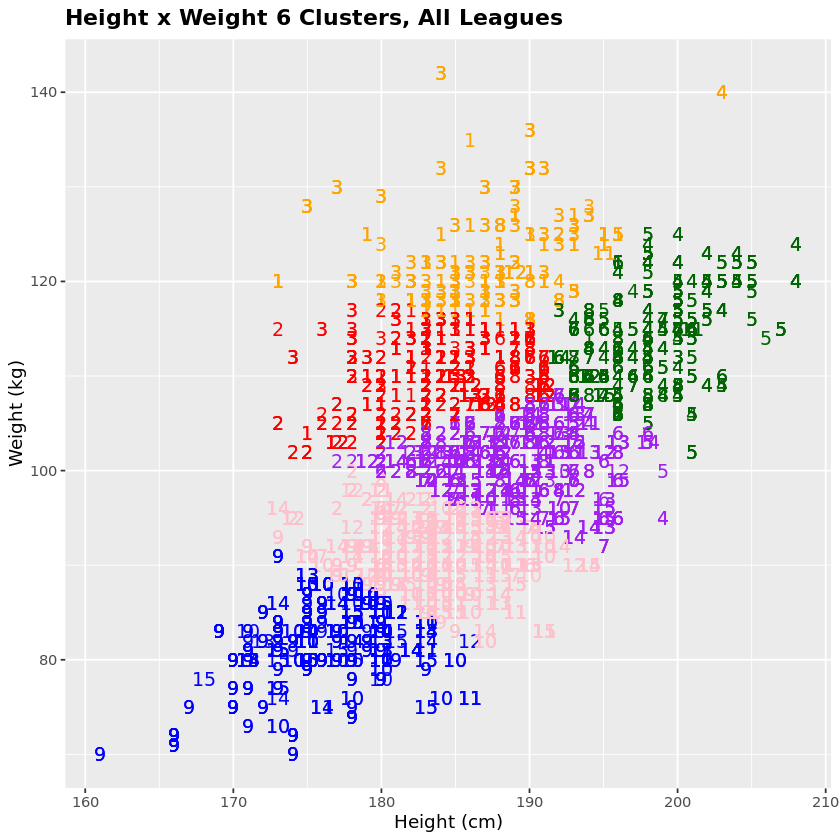

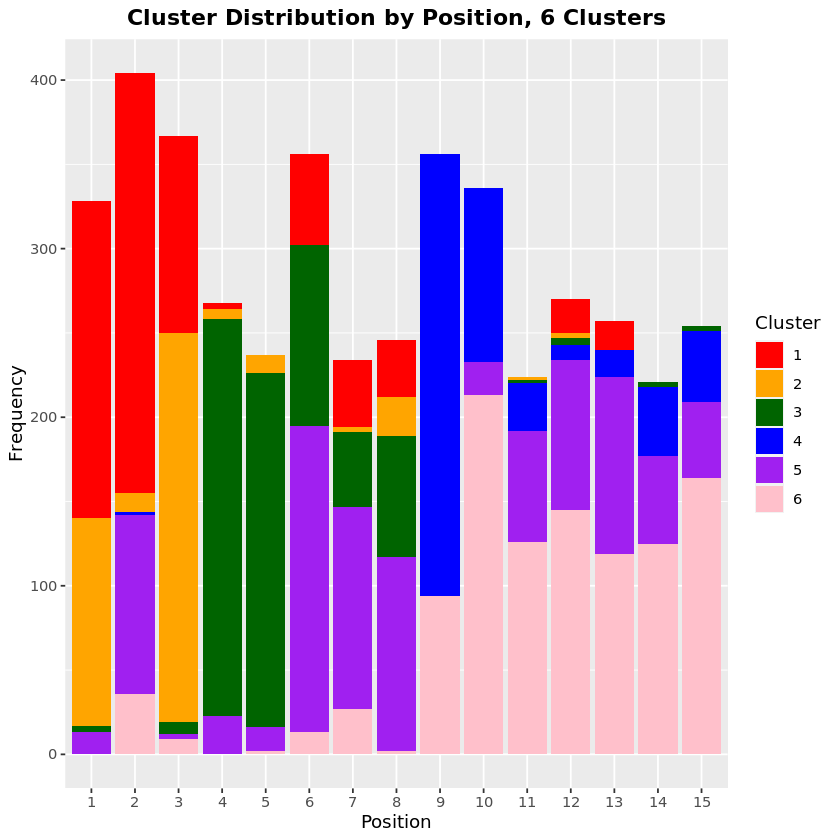

In [6]:
result <- cluster2d(stat1 = "Height", 
                   stat2 = "Weight", 
                   dataset = data, 
                   k = 6)
result[[1]]
result[[2]]


### Stat Per Time

In [9]:
# This function takes in a stat, dataset, unit, year, and league and returns a bar and box plot visualiations of
# the average stat per time passed in for each position (1-15). The bar plot will return a result to visualize the mean of the specified stat per chosen unit by position;
# the box plot will return a result to visualize the distribution of the specified stat per chosen unit by position.
# - The stat is passed in as a string
# - The dataset is passed in simply as is
# - The unit is passed in as a string, referencing "Minutes", "Games", or "Runs"
# - The year is passed in as a string or an integer (optional)
# - The league is passed in as a string (optional)
# The function returns an error message if the arguments are incorrect.
statPerTime <- function(stat, dataset, unit, year, league){
    # Subsets the dataframe to just those years the user passes in the dataframe. If the year is invalid, an error message is printed
    if(missing(year)){
        # The dataframe stays the same if no year argument is passed in
        dataset <- dataset
    } else if(year %in% unique(dataset$Year)){
        dataset <- dataset[dataset$Year == year, ]
      # If neither of the previous conditions are satisfied, the function returns an error message
    } else {
        return("Invalid year.")
    }

    # Subsets the dataframe to just those observations that are specified when the user utilizes the league argument in the function
    if(missing(league)){
        # The dataframe stays the same if no group arguement is passed in
        dataset <- dataset
        league <- "All Leagues"
      # The dataframe will be subset to those rows with International teams
    } else if(league == "International"){
          dataset <- dataset[dataset$Team == "wales" | dataset$Team == "new-zealand" | dataset$Team == "australia" | dataset$Team == "scotland" | dataset$Team == "samoa" | dataset$Team == "argentina" | dataset$Team == "usa" | dataset$Team == "italy" | dataset$Team == "fiji" | dataset$Team == "france" | dataset$Team == "japan" | dataset$Team == "canada" | dataset$Team == "ireland" | dataset$Team == "england" | dataset$Team == "tonga" | dataset$Team == "south-africa" | dataset$Team == "georgia", ]
      if(nrow(dataset) < 1){
          return("Error: There is no data in this league for this year.")
      }
      # The dataframe will be subset to those rows with Super Rugby teams
    } else if(league == "Super Rugby"){
          dataset <- dataset[dataset$Team == "highlanders" | dataset$Team == "waratahs" | dataset$Team == "rebels" | dataset$Team == "reds" | dataset$Team == "jaguares" | dataset$Team == "chiefs" | dataset$Team == "blues" | dataset$Team == "stormers" | dataset$Team == "hurricanes" | dataset$Team == "sunwolves" | dataset$Team == "brumbies" | dataset$Team == "sharks" | dataset$Team == "bulls" | dataset$Team == "crusaders" | dataset$Team == "lions", ]
      if(nrow(dataset) < 1){
          return("Error: There is no data in this league for this year.")
      }
      # The dataframe will be subset to those rows with Premiership teams
    } else if(league == "Premiership"){
          dataset <- dataset[dataset$Team == "bath" | dataset$Team == "bristol" | dataset$Team == "exeter-chiefs" | dataset$Team == "gloucester" | dataset$Team == "harlequins" | dataset$Team == "leicester" | dataset$Team == "northampton" | dataset$Team == "sale" | dataset$Team == "saracens" | dataset$Team == "wasps" | dataset$Team == "worcester", ]
      if(nrow(dataset) < 1){
          return("Error: There is no data in this league for this year.")
      }
      # The dataframe will be subset to those rows with Pro 14 teams
    } else if(league == "Pro14"){
          dataset <- dataset[dataset$Team == "benetton" | dataset$Team == "cardiff-blues" | dataset$Team == "cheetahs" | dataset$Team == "connacht" | dataset$Team == "edinburgh" | dataset$Team == "glasgow" | dataset$Team == "gwent-dragons" | dataset$Team == "kings" | dataset$Team == "leinster" | dataset$Team == "munster" | dataset$Team == "ospreys" | dataset$Team == "scarlets" | dataset$Team == "ulster" | dataset$Team == "zebre", ]
      if(nrow(dataset) < 1){
          return("Error. There is no data in this league for this year.")
      }
      # If none of the other conditions are satisfied, an error is printed
    } else {
          return("Invalid league.")
    }

    # Format unit to match dataset variable name
    if(unit == "Minutes") {
        unit <- "Minutes.Played"
    }
    
    # Adds a column to the dataset that contains that player's stat divided by time
    dataset$statPTime <- (eval(parse(text=(paste0("dataset$",stat))))) / (eval(parse(text=(paste0("dataset$",unit)))))

    # Calculates the average stat per time for each position
    result <- NA # empty vector to store results
    for(i in 1:15){
        result[i] <- mean(dataset$statPTime[dataset$PosNumber == i], na.rm = TRUE)
    }

    ## Plot Visualizations
    # Defines the visualization title unit and y axis label
    if (stat != 'Metres') {
      if(unit == "Minutes.Played") {
        titleunit <- " Per Min, "
        ylabel <- paste0(stat,"/Min")
      } else {
        titleunit <- " Per Game, "
        ylabel <- paste0(stat,"/Game")
      } 
    } else {
      titleunit <- " Per Run, "
      ylabel <- paste0(stat,"/Run")
    }

    # Creates the bar plot visualization
    barVis <- barplot(result, names.arg = c(1:15),
                      col = colorRampPalette(brewer.pal(11, "Spectral"))(15),
                      main = paste0("Barplot: Average ", stat, titleunit, year, ", ", league),
                      xlab = "Position", ylab = ylabel)

    # Creates the box plot visualization
    boxVis <- boxplot(dataset$statPTime ~ dataset$PosNumber, xlab = "Position", ylab = ylabel,
                      main = paste0("Boxplot: ", stat, titleunit, year, ", ", league), 
                      col = colorRampPalette(brewer.pal(11, "Spectral"))(15))

    # Return the plot visualizations
    return(list(barVis, boxVis))
}



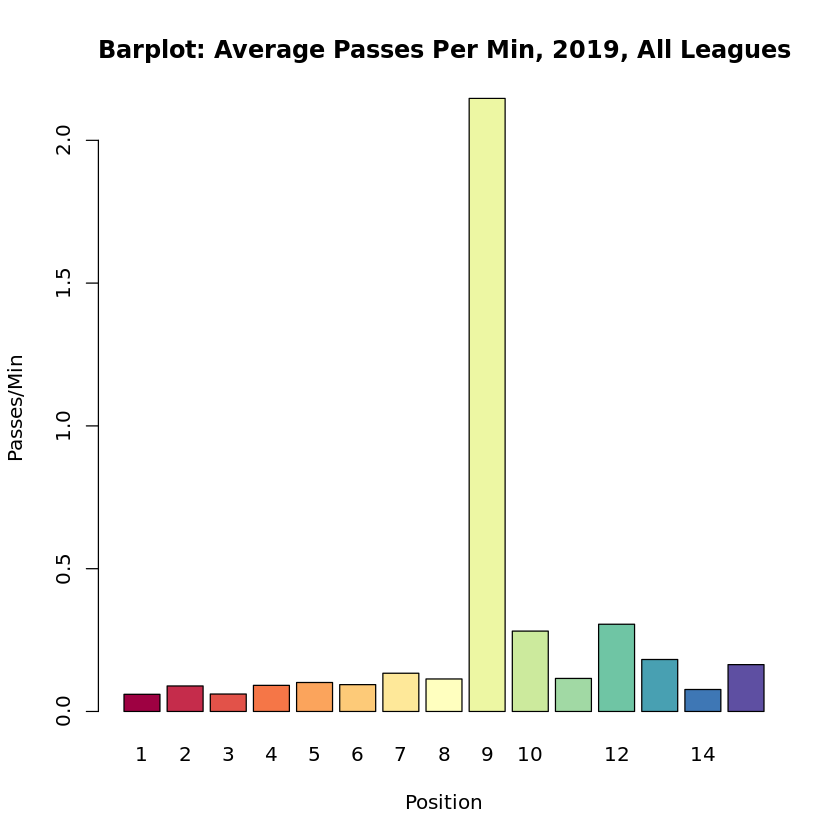

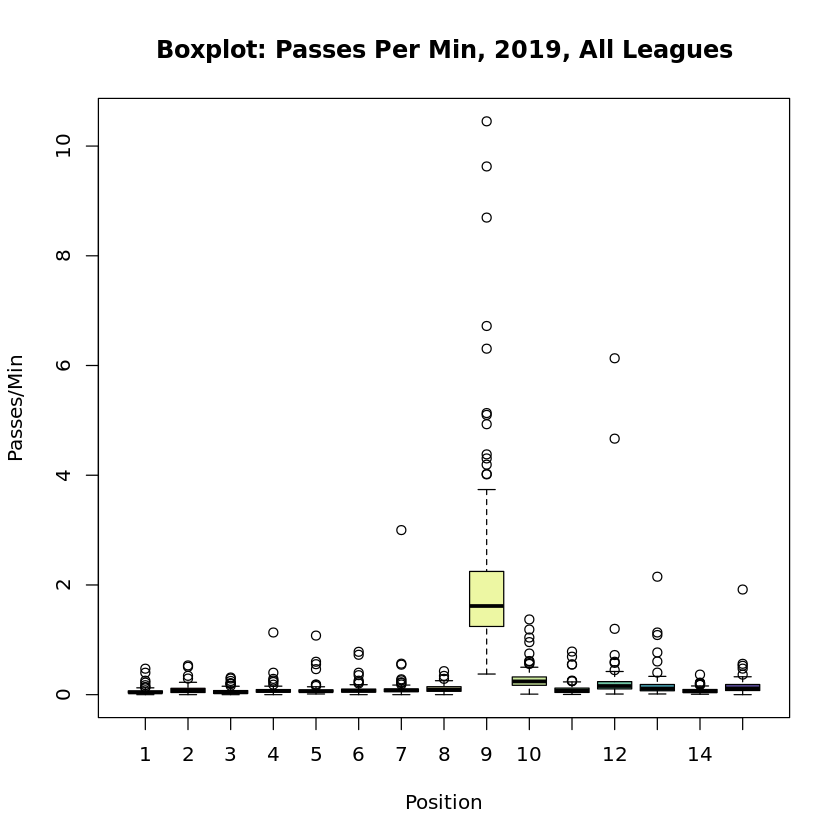

In [10]:
result <- statPerTime(stat = "Passes", 
                      dataset = data, 
                      unit = "Minutes", 
                      year = 2019)